<a href="https://colab.research.google.com/github/eprayoga/Klasifikasi-Hatespeech-Neural-Network/blob/main/KlasifikasiHateSpeechNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memanggil Dataset
referensi dataset diambil dari hasil penelitian, yaitu oleh
Ika Alfina, Rio Mulia, Mohamad Ivan Fanany, and Yudo Ekanata, "Hate Speech Detection in Indonesian Language: A Dataset and Preliminary Study ", in Proceeding of 9th International Conference on Advanced Computer Science and Information Systems 2017(ICACSIS 2017).


In [46]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/eprayoga/Klasifikasi-Hatespeech-Neural-Network/main/dataset/id_hatespeech.csv'

df = pd.read_csv(dataset_url)
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


Non_HS    453
HS        260
Name: Label, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


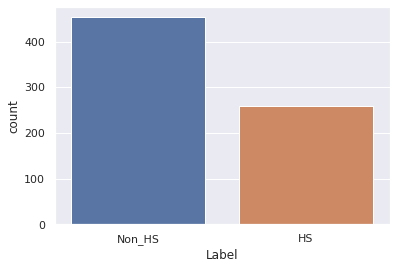

In [47]:
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

print(df['Label'].value_counts())
print('\n')
print(sns.countplot(df['Label']))

# Data Preprocessing

## Case Folding

In [48]:
import re

def case_folding(data):
  temp_tweet = []

  for tweet in data:
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    tweet = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('RT', '', tweet)
    tweet = re.sub("[^a-zA-Z^']", " ", tweet)
    tweet = re.sub(" {2,}", " ", tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    tweet = tweet.lower();
    temp_tweet.append(tweet)
  return temp_tweet

In [49]:
df['Tweet']=case_folding(df['Tweet'])
df.head()

,Label,Tweet
0,Non_HS,fadli zon minta mendagri segera menonaktifkan ...
1,Non_HS,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,waspada ktp palsu kawal pilkada


## Tokenize

In [50]:
import nltk
nltk.download('punkt')

def tokenized(data):
  return data.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
df['Tweet']=tokenized(df['Tweet'])
df.head()

,Label,Tweet
0,Non_HS,"[fadli, zon, minta, mendagri, segera, menonakt..."
1,Non_HS,"[mereka, terus, melukai, aksi, dalam, rangka, ..."
2,Non_HS,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,Non_HS,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,"[waspada, ktp, palsu, kawal, pilkada]"


## Stemming

In [52]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [54]:
df['Tweet'] = df['Tweet'].apply(stemming)
df.head()

,Label,Tweet
0,Non_HS,"[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,"[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,"[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,"[waspada, ktp, palsu, kawal, pilkada]"


## Slang Words Removal

In [55]:
import requests

slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [56]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [57]:
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [58]:
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [59]:
def removeSlang(data):
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [60]:
df['Tweet'] = df['Tweet'].apply(removeSlang)
df.head()

,Label,Tweet
0,Non_HS,"[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,"[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,"[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"[ahmad, dhani, tidak, puas, debat, pemilihan k..."
4,Non_HS,"[waspada, ktp, palsu, kawal, pemilihan kepala ..."


# Stop Words Removal

In [61]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df['Tweet']=removeStopWords(df['Tweet'])
df.head()

,Label,Tweet
0,Non_HS,"[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,"[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,"[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,Non_HS,"[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,Non_HS,"[waspada, ktp, palsu, kawal, pemilihan kepala ..."


## Finalisasi

Ubah target (Label) Value

In [63]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df.head()

,Label,Tweet
0,0,"[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,"[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,"[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,0,"[waspada, ktp, palsu, kawal, pemilihan kepala ..."


Kombinasi menjadi data dalam satu string

In [64]:
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet
0,0,fadli zon mendagri nonaktif ahok gubernur dki
1,0,luka aksi rangka penjara ahok ahok gagal pemil...
2,0,sylvi gurbernur laku keras perempuan bukti fot...
3,0,ahmad dhani puas debat pemilihan kepala daerah...
4,0,waspada ktp palsu kawal pemilihan kepala daerah


# Word Cloud

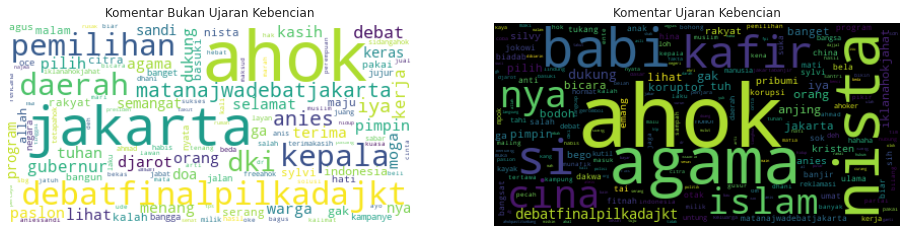

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(df['Tweet'][df.Label == 0])
text_neg = " ".join(df['Tweet'][df.Label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Komentar Bukan Ujaran Kebencian')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Komentar Ujaran Kebencian')
plt.show()

# Text Vectorization (TF-IDF)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Tweet']
label = df['Label']

In [66]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(713, 1951)

# Balanced Dataset

In [70]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(906, 1951)
(906,)


# Split Data
Membagi data menjadi dua bagian, untuk data training dan data testing.
pendistribusian data untuk data testing sebesar 20%

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)

# Hasil dari pembagian dataset
kalkulasi_train = y_train.value_counts()
kalkulasi_test = y_test.value_counts()
print("Total data latih : \n", kalkulasi_train)
print("Total data tes : \n", kalkulasi_test)

Total data latih : 
 1    369
0    355
Name: Label, dtype: int64
Total data tes : 
 0    98
1    84
Name: Label, dtype: int64


# Membuat Model Backpropagation Neural Network

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train).toarray()
X_test = sc.fit_transform(X_test).toarray()

In [74]:
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(30, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                58560     
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 59,521
Trainable params: 59,521
Non-trainable params: 0
_________________________________________________________________


In [75]:
# run model
history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
73/73 [==============================] - 1s 7ms/step - loss: 0.6694 - accuracy: 0.6119 - val_loss: 0.6179 - val_accuracy: 0.7473
Epoch 2/10
73/73 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.9006 - val_loss: 0.4073 - val_accuracy: 0.8077
Epoch 3/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9738 - val_loss: 0.3390 - val_accuracy: 0.8407
Epoch 4/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.3365 - val_accuracy: 0.8516
Epoch 5/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9972 - val_loss: 0.3438 - val_accuracy: 0.8626
Epoch 6/10
73/73 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3415 - val_accuracy: 0.8736
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3411 - val_accuracy: 0.8901
Epoch 8/10
73/73 [==

In [76]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8791


In [77]:
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

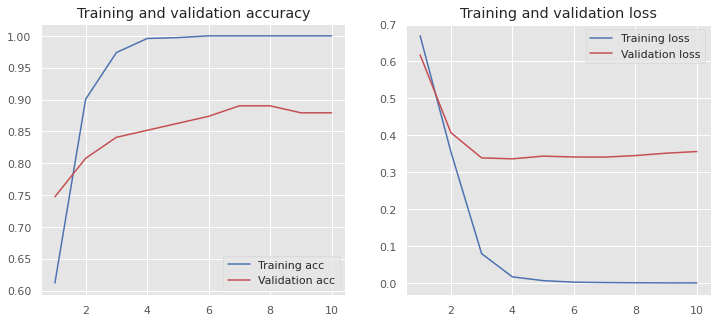

In [78]:
plot_history(history)

In [114]:
def prediksi(tweets):
  vectorized_tweets = tfidf_vectorizer.transform(tweets).toarray()
  input_prediction = model.predict(vectorized_tweets)

  print('text :', tweets[0])
  if input_prediction[0][0]>=0.65:
    print("\nPrediksi : \nkomentar ujaran kebencian!!!")
  else:
    print("\nPrediksi : \nbukan komentar ujaran kebencian")

In [115]:
prediksi(["Alhamdulilah persib menang hari ini"])

1/1 [==============================] - 0s 27ms/step
text : Alhamdulilah persib menang hari ini

Prediksi : 
bukan komentar ujaran kebencian


In [116]:
prediksi(["Messi kafir anjing"])

1/1 [==============================] - 0s 18ms/step
text : Messi kafir anjing

Prediksi : 
komentar ujaran kebencian!!!
